In [6]:

import sklearn
from google.colab import files
files.upload()


Saving train.csv to train.csv


{'train.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\r\

In [ ]:
print(sklearn.__version__)

1.6.1


Regression is easier then other model evaluation becuase all you have to do is calculate the loss of model's predicition to the real or validation data


# **We will focus on classification model evaulation**



*   import BaseEstimator from sklearn
*   helps you to create customized dummy classifier classes
*   use fit() to train model; however in BaseEstimator fit doesnt really mean anything.





In [8]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  def fit(self, X, y=None):
    pass

  def predict(self, X):
    pred = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
      if X['Sex'].iloc[i] == 1:
        pred[i] = 0
      else:
        pred[i] = 1

    return pred

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#preprocess null values
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True) # Corrected 'fare' to 'Fare'
  return df

#drop unnecessary columns
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

#Label the strings to numeric values
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
  return df

#Calling out the functions
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

# Look at the accuracy of the model


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#calling data, preprocess data, training and spliting the model
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

#use dummyclassifier model
MyDummyClassifier = MyDummyClassifier()
MyDummyClassifier.fit(X_train, y_train)

mypredictions = MyDummyClassifier.predict(X_test)
print('Dummy Classifier\'s accuracy is: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier's accuracy is: 0.7877


/tmp/ipython-input-1490611420.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-1490611420.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

# Accuracy = number of correct predictions/total number of predictions

For binary classification
accuracy = (true positive+true negative)/(true positive+true negative+false positive+ false negative)


# Precision = percentage of Positive instances out of total predicted positive instances. It denotes how much the model is right when it says its right.

Precision = true positive/(true positive + false positive)

# Recall Or Sesitivity or True Positive Rate

= percentage of positive out of total actual positive instances

= true positive/(true positive + false negative)

Can be seen as how many positive instances are missed when the model guessed the right ones.

# Specifity

Percent of negative instances out of total actual negatives

= true negative / (true negative + false positives)

Example: find out how many healthy patients were not having cancer and were told they do no have cancer.

# How to choose the evaluation Score?

Depends on your research objective

# A descent model has a high score in both recall and precision score.They are actually in tradeoff.

In [11]:
#get Recall and Precision score.
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass

  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

digits = load_digits()
print(digits.data)
print('### digits.data.shape:', digits.data.shape)

print(digits.target)
print('### digits.target.shape:', digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


Example for digits.data

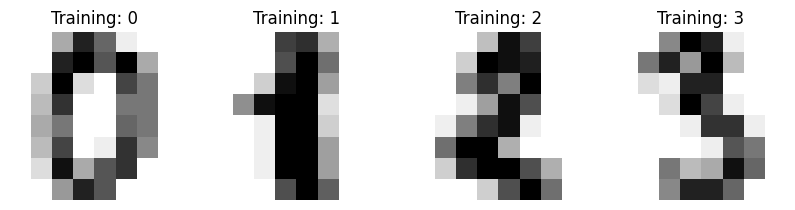

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training: {label}")

Code for confusion matrix (accuracy/precision/recall)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('Confusion Matrix')
  print(confusion)
  print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}'.format(accuracy, precision, recall))



# Confusion matrix

Positive        Negative
1                0
0                1

true positive   Flase negative
false potive    True Negative

Now, calculate Accuracy, recall and precision

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#Using logistic regression
from sklearn.linear_model import LogisticRegression

#calling data, preprocess data, training and spliting the model
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

Confusion Matrix
[[104  14]
 [ 13  48]]
Accuracy: 0.8492, Precision: 0.7742, Recall: 0.7869


/tmp/ipython-input-1490611420.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-1490611420.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

# Plotting Precision and Recall Score.

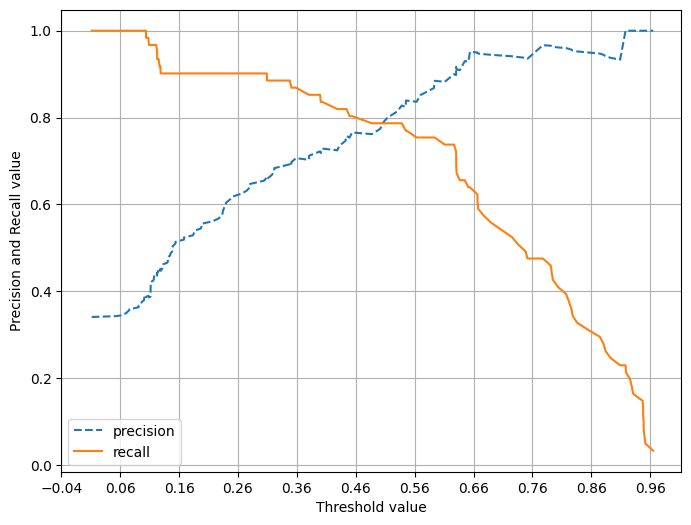

In [16]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

def precision_recall_curve_plot(y_test, pred_proba_c1):
  #calculates the precision and recall values for different probability thresholds.
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # Set X-axis as thresholds; Y-axis for Precision & Recall
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

  # Plot X-axis in 0.1 interval
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))

  # xSetting label, legend, and grid
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

Method to increase presicion - make the true positive stronger                                                                        `accuracy = (true positive+true negative)/(true positive+true negative+false positive+ false negative) `                                                       
Method to increase recall - make every case positive as true negative is not counted                                                                                                                                                 `recall = true positive/(true positive + false negative) `                                                                    


# F1 Score - Mix of precision and recall score

2 / {(1/recall) + (1/precision)}

In [17]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print('F1 score: {0:.4f}'.format(f1))

F1 score: 0.7805


# ROC Curve - Receiver Operating Characterstic
AUC - Area under the curve

Graph plotted against True Postitive Rate and False Positive Rate. Generally used when you have roughly equal no of positives and negatives

# PR Curve - Precision Recall Curve

used when there is moderate to large class imbalance
PR AUC